In [85]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas

In [86]:
# Create function for pulling only the adjusted close of each ticker
def close(x):
    return x["Adj Close"]

In [87]:
# Import YTD data for each ticker
AAPL = pd.read_csv(
        "AAPL.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

AMZN = pd.read_csv(
        "AMZN.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

GME = pd.read_csv(
        "GME.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

GOOG = pd.read_csv(
        "GOOG.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

NFLX = pd.read_csv(
        "NFLX.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

SPY = pd.read_csv(
        "SPY.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

META = pd.read_csv(
        "META.csv",
        index_col="Date",
        parse_dates=True,
        infer_datetime_format=True
)

In [88]:
# Pull only adjusted close for each ticker and rename columns
AAPL_close = close(AAPL).rename("AAPL")
AMZN_close = close(AMZN).rename("AMZN")
GME_close = close(GME).rename("GME")
GOOG_close = close(GOOG).rename("GOOG")
NFLX_close = close(NFLX).rename("NFLX")
SPY_close = close(SPY).rename("SPY")
META_close = close(META).rename("META")

In [89]:
# Combine all tickers into a single DataFrame
df = pd.concat([AAPL_close, AMZN_close, GME_close, GOOG_close, NFLX_close, SPY_close, META_close], axis=1)

In [90]:
# Calculate the percent change of the DataFrame
df1 = df.pct_change()

In [94]:
# Plot cumulative returns
plot = ((df1 + 1).cumprod() - 1).hvplot(title="2022 YTD Returns", ylabel="Percent Change")
plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [95]:
((df1 + 1).cumprod() - 1).hvplot(title="2022 YTD Returns", ylabel="Percent Change")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [92]:
hvplot.save(plot, 'analysis.html')

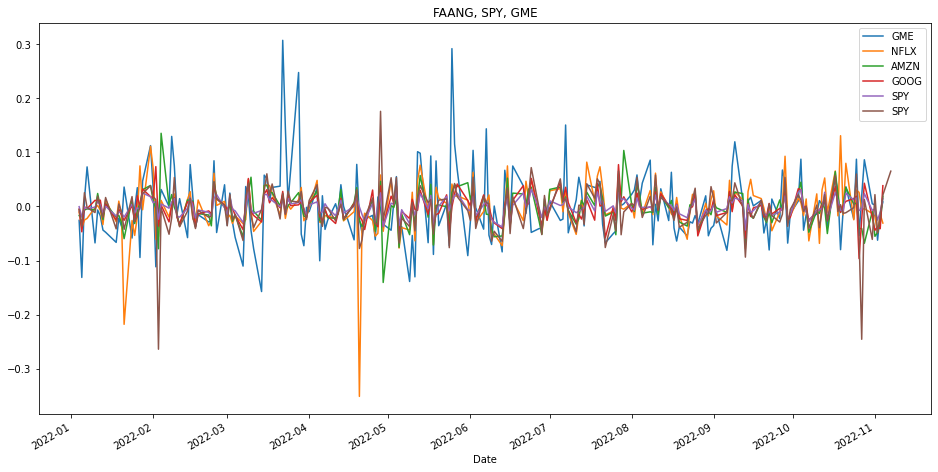

In [93]:
# Just for fun, plot percent change for each ticker
GME["Adj Close"].pct_change().plot(label="GME", figsize=(16,8), title="FAANG, SPY, GME")
NFLX["Adj Close"].pct_change().plot(label="NFLX")
AMZN["Adj Close"].pct_change().plot(label="AMZN")
GOOG["Adj Close"].pct_change().plot(label="GOOG")
SPY["Adj Close"].pct_change().plot(label="SPY")
META["Adj Close"].pct_change().plot(label="SPY")
plt.legend()